In [30]:
# Santosh Omprakash
# Project 3 - Employee Attrition Prediction

In [31]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import SGDClassifier
from numpy import mean, std
import scikitplot as skplt
from sklearn.naive_bayes import MultinomialNB

In [32]:
# Read employee attrition dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [33]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

The dataset does not have any variable with null values. Hence, it can used as is for further processing

In [35]:
feature_var = []
for i in df.columns:
    feature_var.append([i, df[i].drop_duplicates().values, df[i].nunique()])
pd.DataFrame(feature_var, columns = ['Features', 'Values', 'Unique count'])

,Features,Values,Unique count
0,Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...",43
1,Attrition,"[Yes, No]",2
2,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]",3
3,DailyRate,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...",886
4,Department,"[Sales, Research & Development, Human Resources]",3
5,DistanceFromHome,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...",29
6,Education,"[2, 1, 4, 3, 5]",5
7,EducationField,"[Life Sciences, Other, Medical, Marketing, Tec...",6
8,EmployeeCount,[1],1
9,EmployeeNumber,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...",1470


EmployeeCount, Over18 and StandardHours variables can be dropped as it just has one unique value. EmployeeNumber can also be dropped as it's just sequential number to represent the record number.

In [36]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

### Exploratory Data Analysis

C:\Users\oneor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


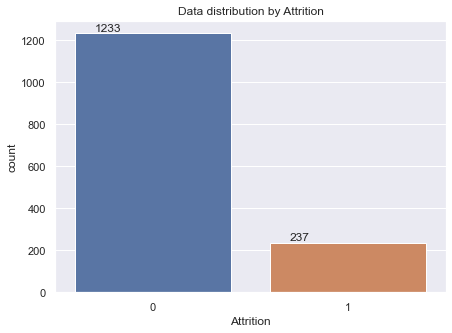

In [61]:
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot('Attrition', data=df)
plt.title('Data distribution by Attrition')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))

As seen above, the dataset is imbalanced

Data visualization of some variables to understand the trend

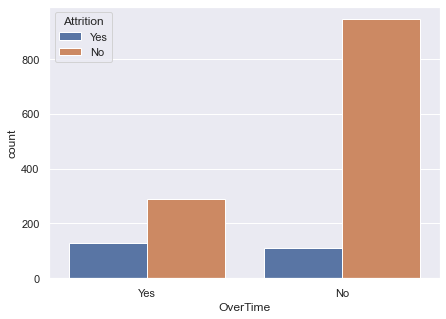

In [38]:
# Overtime vs Attrition
sns.countplot(x=df['OverTime'],hue=df["Attrition"])
plt.show()

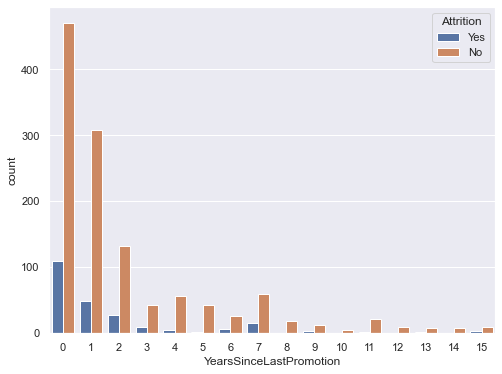

In [39]:
# Year since last promotion vs Attrition
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x=df['YearsSinceLastPromotion'],hue=df["Attrition"])
plt.show()

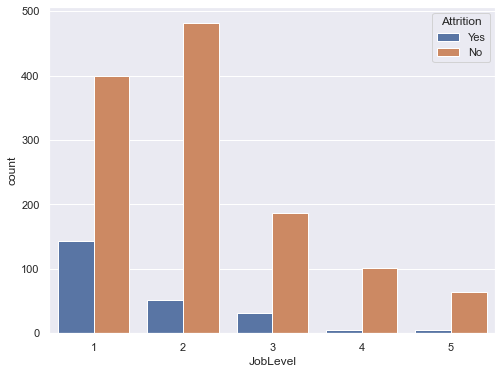

In [40]:
# Job Level vs Attrition
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x=df['JobLevel'],hue=df["Attrition"])
plt.show()

In [41]:
df_attr = df.loc[(df.Attrition == 'Yes')]

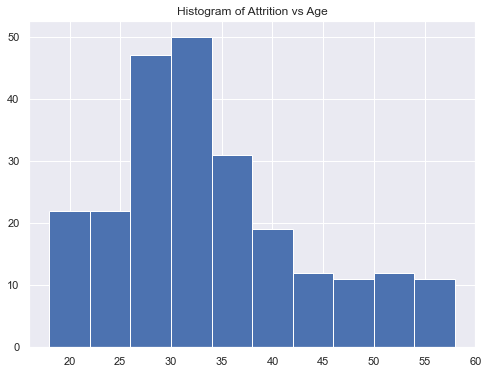

In [42]:
# Age vs Attrition
df_attr.hist(column='Age')
plt.title('Histogram of Attrition vs Age')
plt.show()

Attrition is more between age group 25 to 35

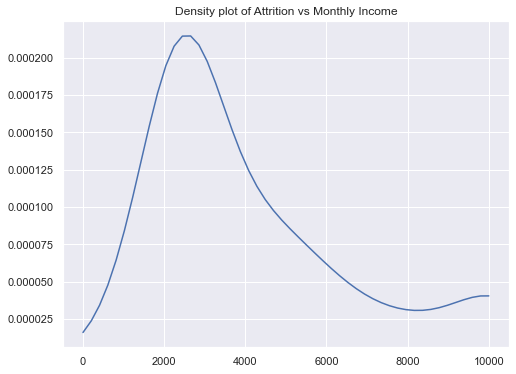

In [43]:
# MonthlyIncome vs Attrition
from scipy.stats import gaussian_kde
data = df_attr['MonthlyIncome']
density = gaussian_kde(data)
xs = np.linspace(0,10000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.title('Density plot of Attrition vs Monthly Income')
plt.show()

Text(0.5, 1.0, 'Number of companies worked vs Attrition')

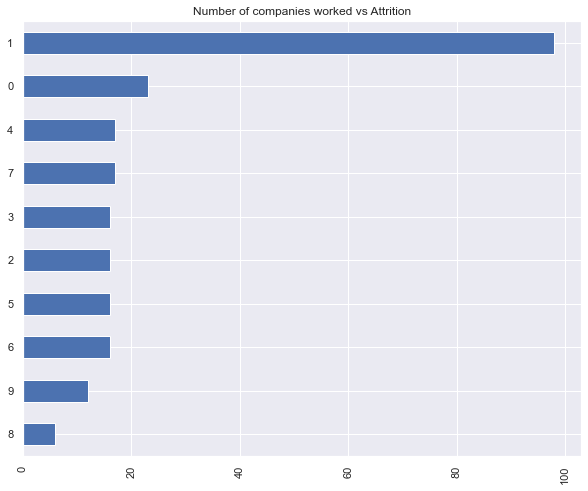

In [44]:
# Number of companies worked
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
df_attr.NumCompaniesWorked.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of companies worked vs Attrition')

The attrition rate is more when the number of companies worked is 0 and 1

Text(0.5, 1.0, 'Education field vs Attrition')

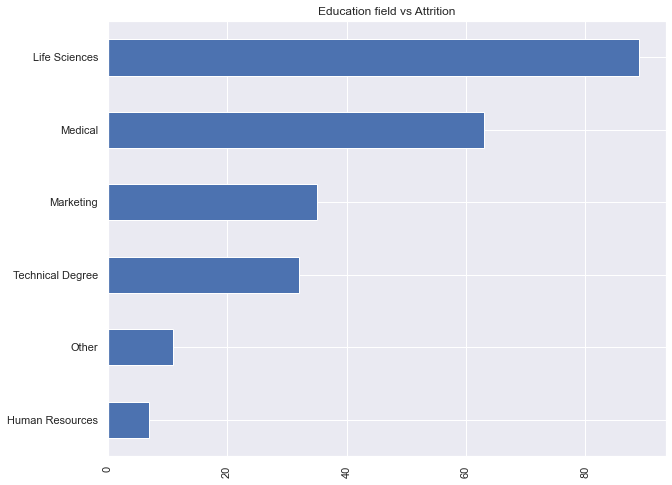

In [45]:
# Education field vs Attrition
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
df_attr.EducationField.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Education field vs Attrition')

<AxesSubplot:xlabel='YearsAtCompany'>

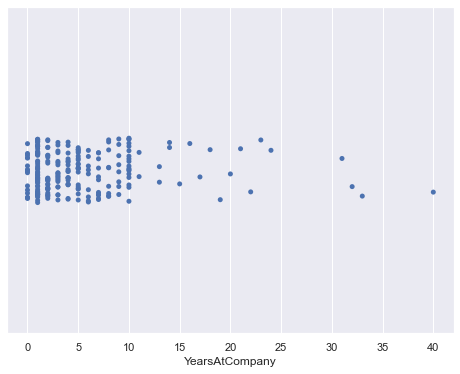

In [46]:
# Years at company vs attrition
sns.stripplot(x=df_attr['YearsAtCompany'])

Text(0.5, 1.0, 'Job Role vs Attrition')

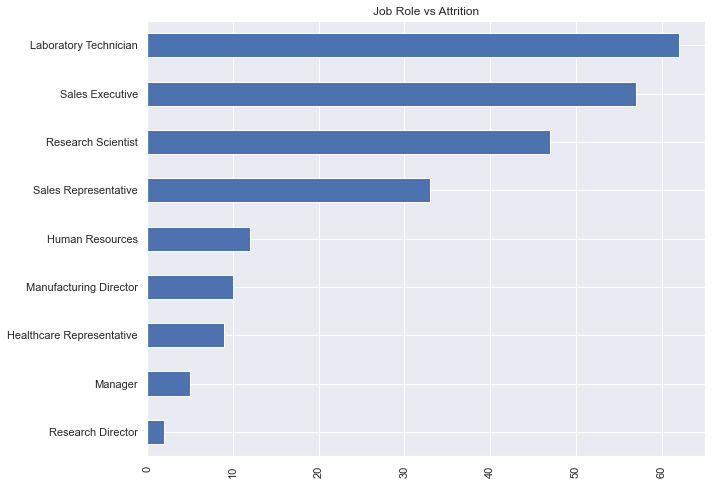

In [63]:
# Job role vs Attrition
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
df_attr.JobRole.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Job Role vs Attrition')

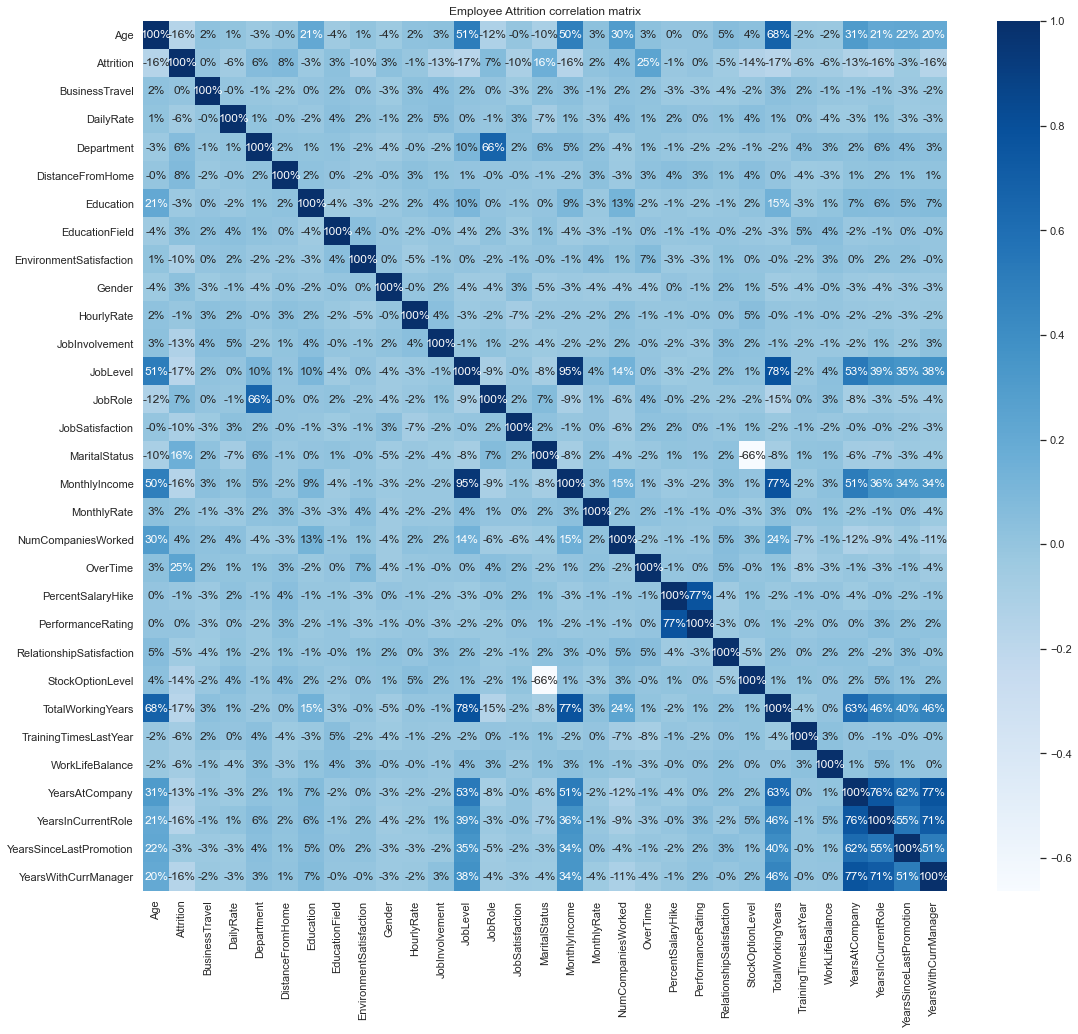

In [64]:
# Correlation matrix
sns.set(rc={'figure.figsize':(18,16)})
corr = df.corr()
sns.heatmap(corr, cmap="Blues", annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,fmt='.0%')
plt.title('Employee Attrition correlation matrix')
plt.show()

In [48]:
# Label encode Attrition
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Attrition'] = label.fit_transform(df['Attrition'])

In [49]:
df['BusinessTravel'] = label.fit_transform(df['BusinessTravel'])
df['Department'] = label.fit_transform(df['Department'])
df['EducationField'] = label.fit_transform(df['EducationField'])
df['Gender'] = label.fit_transform(df['Gender'])
df['JobRole'] = label.fit_transform(df['JobRole'])
df['MaritalStatus'] = label.fit_transform(df['MaritalStatus'])
df['OverTime'] = label.fit_transform(df['OverTime'])

### Model Selection and Evaluation

In [50]:
# Train and Test data
X = df.loc[:,df.columns!='Attrition']
y = df['Attrition']

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [52]:
# Feature selection using SelectKBest feature selection
skbest = SelectKBest(k=20)
skbest.fit(X_train,y_train)
X_train_skbest=skbest.transform(X_train)
X_test_skbest=skbest.transform(X_test)

In [53]:
# SelectKBest to determine 10 best features
best_features = SelectKBest(score_func=f_classif, k=20)
fit = best_features.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(20,'Score'))         # print 20 best features

                Feature_Name      Score
18                  OverTime  56.559538
23         TotalWorkingYears  42.143368
0                        Age  41.729236
29      YearsWithCurrManager  34.427882
27        YearsInCurrentRole  33.692718
11                  JobLevel  33.368331
15             MonthlyIncome  31.017502
26            YearsAtCompany  28.952703
14             MaritalStatus  28.049293
22          StockOptionLevel  24.439454
10            JobInvolvement  18.656350
7    EnvironmentSatisfaction  15.169368
13           JobSatisfaction  12.686817
4           DistanceFromHome   8.900725
25           WorkLifeBalance   7.622819
2                  DailyRate   6.015380
3                 Department   5.054415
17        NumCompaniesWorked   2.784982
12                   JobRole   2.690796
21  RelationshipSatisfaction   2.212336


In [54]:
# Normalization 
scaler = StandardScaler()
scaler.fit(X_train_skbest)
X_train_norm = scaler.transform(X_train_skbest)
X_test_norm = scaler.transform(X_test_skbest)

In [55]:
def model_val(X, y, classifier, scor, show):
    X = np.array(X)
    y = np.array(y)
    scores = cross_val_score(classifier, X, y, scoring=scor)
    return scores.mean()

In [56]:
# List of models
rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sgdc = SGDClassifier()
lr = LogisticRegression()

model = []
score = []

# Check model score
for classifier in (rfc, ctc, sgdc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(X_train_norm, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

,roc_auc
RandomForestClassifier,0.800975
DecisionTreeClassifier,0.622116
SGDClassifier,0.743739
LogisticRegression,0.804756


### Hyperparameter Tuning

In [57]:
# Hyperparameter tuning using Grid Search
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}]
logisticreg = LogisticRegression()
grid_search = GridSearchCV(estimator = logisticreg,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           n_jobs = -1)
grid_search.fit(X_train_norm, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear']}],
             scoring='roc_auc')

In [58]:
print('Best Score: ', grid_search.best_score_.round(2))
print('Best Parameters: ', grid_search.best_params_)

Best Score:  0.81
Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [59]:
y_pred = grid_search.predict(X_test_norm)
# Decimal places based on number of samples
dec = np.int64(np.ceil(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred), '\n')
    
print('Classification report')
print(classification_report(y_test, y_pred, digits=dec))
    
print('Scalar Metrics')
format_str = '%%13s = %%.%if' % dec
if y_test.nunique() <= 2: # metrics for binary classification
    try:
        y_score = grid_search.predict_proba(X_test_norm)[:,1]
    except:
        y_score = grid_search.decision_function(X_test_norm)
    print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[243   4]
 [ 32  15]] 

Classification report
              precision    recall  f1-score   support

           0      0.884     0.984     0.931       247
           1      0.789     0.319     0.455        47

    accuracy                          0.878       294
   macro avg      0.837     0.651     0.693       294
weighted avg      0.869     0.878     0.855       294

Scalar Metrics
        AUROC = 0.789


Text(0.5, 0, '0 - No; 1 - Yes')

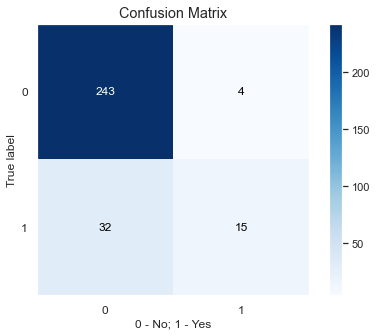

In [62]:
# Confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.xlabel('0 - No; 1 - Yes')